# Quantum Random Walk Model of Crystal Interferometer

### In the previous project, we looked at how to simulate quantum walk from a single crystal. Here, we will extend the concepts introduced there to a three blade. Below is the quantum walk from a single crystal.

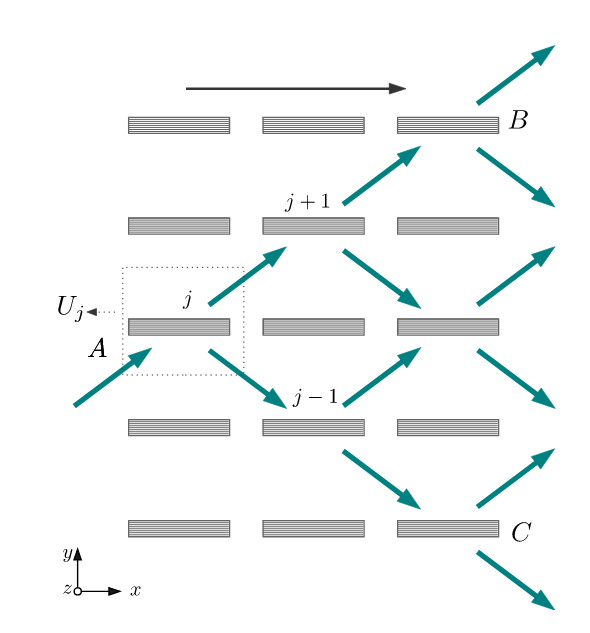

#### Source: https://arxiv.org/pdf/1605.02596.pdf

### When multiple of these are arranged together, they form a device called interferometer. In this project, we basically will simulate the profiles of the beams exiting this device. There are several applications which include builsing optimized interferometers for experimental physics. Leaving that aside, it is also a cool way to compare ramdom walks simulation and their quantum counterparts.logy is by stating that the coin is neither in the head or tail but a superposition.

In [1]:
#Fully functional program. Capable of plotting the probability distrubution for
#each beam inside a three blade NI.

import matplotlib.pyplot as plt
import numpy as np
import pylab

###################Beginning of functions!######################################
def AbsF(psin):
    psif = np.linalg.norm(psin,ord=2,axis=0)**2;
    return psif
    
def BladeF(Ope,n,psin):
    
    PsiPad = np.zeros((2,n-1));
    psi = np.concatenate((psin,PsiPad),axis=1);
    Opef = Ope;
    psi=np.matrix(psi)

    for j in range(0, n):
        psi = Opef*psi;
        psi[1] = np.roll(psi[1],1,axis=1);
        
    psiR = np.concatenate((np.zeros((1,np.size(psi[1]))),psi[1]),axis=0);
    psiT = np.concatenate((psi[0],np.zeros((1,np.size(psi[1])))),axis=0);
        
    return psiR, psiT
    
###################End of functions!###########################################

### Adding more blades gives rise to a three blade NI. We can simulate the beams to obtain Fig 6

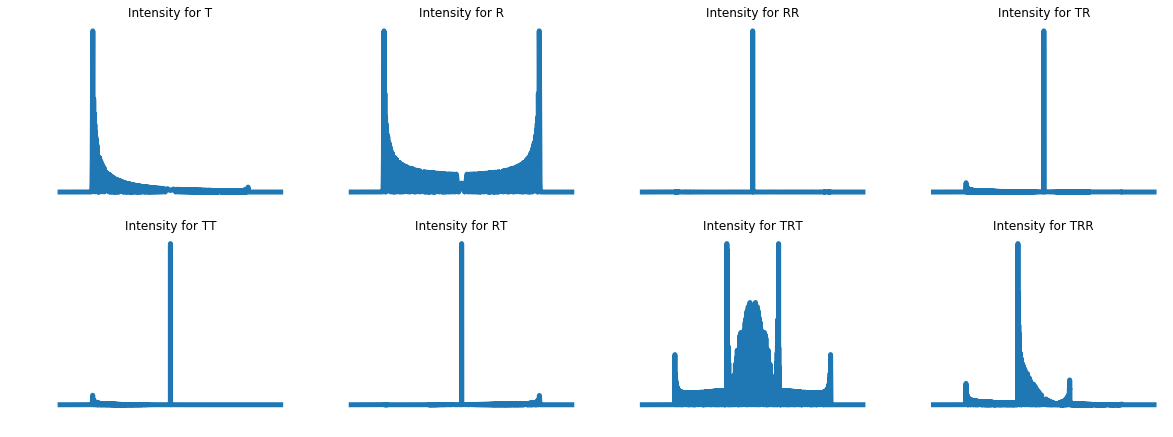

In [14]:


def main():
    #Flags    
    n = 2000 #%number of planes used. Should re reduced to 100 for a start.
    
    psi0 = np.array([[1],[0]]); #initial state
    q=3*np.pi/(4)
    Had = np.matrix([[np.cos(q), np.sin(q)],[-np.sin(q), np.cos(q)]]) 
    #Operator of the plane
    
    #%%%%%%%%%%%%%
    #first blade%
    #%%%%%%%%%%%%
    
    [psiR,psiT] = BladeF(Had,n,psi0);

    
    #%%%%%%%%%%%%%%%
    #Second blades%
    #%%%%%%%%%%%%%%%
    
    [psiTR, psiTT] = BladeF(Had,n,psiT);
    
    
    [psiRT, psiRR] = BladeF(Had,n,psiR);
    
    
    #%%%%%%%%%%%%%%%
    #Third blades%
    #%%%%%%%%%%%%%%%
    
    psiTRX = psiRR+psiTR; #input to the third blade is a sum of two beams
    
    [psiTRT,psiTRR] = BladeF(Had,n,psiTRX);
  
    #Intensities on each beam

   
    figsize = (20, 15)
    cols = 4

##T-trsnmission, R-Reflection

    Psi = [AbsF(psiT), AbsF(psiR), AbsF(psiRR), AbsF(psiTR), AbsF(psiTT), AbsF(psiRT), AbsF(psiTRT), AbsF(psiTRR)]  
    axlabel = ['T', 'R', 'RR', 'TR', 'TT', 'RT', 'TRT', 'TRR'] 

    fig = plt.figure(num=1, figsize=figsize)
    ax = []
    for k, psiv in enumerate(Psi):
        ax.append(fig.add_subplot(cols,cols,k+1))
        ax[-1].set_title('Intensity for {}'.format(axlabel[k]))
        ax[-1].plot( psiv, '-',linewidth=5, ls='-')
        plt.axis('off')
        
       
if __name__ == "__main__":
    main()  

## Other configurations are possible. In the next work we will show how to extend it to other geometries